In [17]:
import matplotlib.pyplot as plt
import pandas as pd
#plt.rcParams["figure.figsize"] = (10,7)

alphas = [-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20]
fs = 15
legend_fs = 11

folder = 'const-wind/'

In [18]:
sdata = pd.read_csv(folder + 'polar-data2d.csv')
cdata = pd.read_csv(folder + 'cart-data2d.csv')

cdata.head(3)
sdata['V_rel_block'] = sdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)
cdata['V_rel_block'] = cdata.apply(lambda row: row.V_block_fin - row.Wind_x, axis=1)

time = cdata['TotTime'].max()

sdata.head(4)

,Iter,TotTime,m_block,Alpha,Theta0,Theta_fin,V_theta_fin,V_block_fin,Wind_x,Wind_y,Vkitex,Vkitez,Vrelx,Vrely,F_vinc,Tension,Lift,Drag,Stability,V_rel_block
0,35058,3.51,100.0,-8.0,0.79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,981.00,-182.78,-191.10,6.37,0,0.0
1,46506,4.65,100.0,-8.0,0.79,0.0,0.0,0.0,2.0,0.0,0.0,0.0,-2.0,0.0,980.99,238.51,-228.87,7.63,0,-2.0
2,40178,4.02,100.0,-8.0,0.79,0.0,0.0,0.0,4.0,0.0,0.0,0.0,-4.0,0.0,980.99,664.72,-640.95,21.37,0,-4.0
3,27820,2.78,100.0,-8.0,0.79,0.0,0.0,0.0,6.0,0.0,0.0,0.0,-6.0,0.0,980.97,1273.95,-1231.37,41.05,0,-6.0


## 1) Block velocities as a function of the attack angle for various wind velocities

In [19]:
wmin = 10
wmax = 41
step = 2

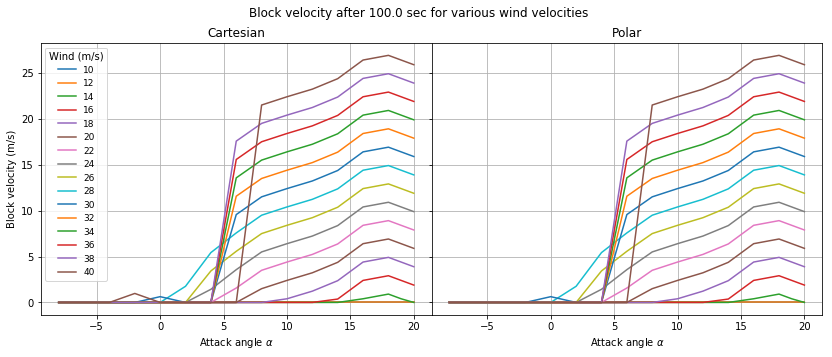

In [20]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Block velocity after " + str(time) + " sec for various wind velocities")
    
    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    axs[0].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.grid(b=True)
    
    wdf = sdata.loc[sdata['Wind_x'] == float(w)]
    wdf.head(2)
    axs[1].plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel('Block velocity (m/s)')
    #axs[0].set_xlim(0,20)
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
plt.savefig('Images/vblock_alpha_pi4.png')

###  a) Cartesian coordinates

for w in range(wmin, wmax, step): 
    wdf = cdata.loc[cdata['Wind_x'] == float(w)]
    plt.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.ylabel('Block velocity (m/s)', fontsize=fs)
    plt.xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    plt.title("Block velocity after 300 sec for various wind velocities")
    plt.legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    plt.grid(b=True)

###  b) Polar coordinates

for w in range(wmin, wmax, step): 
    wdf = sdata.loc[cdata['Wind_x'] == float(w)]
    plt.plot(wdf['Alpha'], wdf['V_block_fin'], label=str(w))
    plt.ylabel('Block velocity (m/s)', fontsize=fs)
    plt.xlabel('Attack angle ' + r'$\alpha$', fontsize=fs)
    plt.title("Block velocity after 300 sec for various wind velocities")
    plt.legend(title = 'Wind (m/s)', fontsize = legend_fs, loc='upper left')
    plt.grid(b=True)

## 2) Kite relative velocity as a function of wind velocities for various alpha

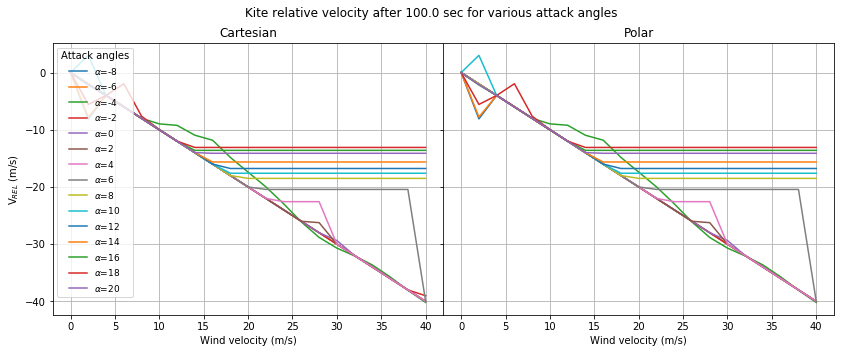

In [21]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for i, angle in enumerate(alphas): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various attack angles")
    
    wdfc = cdata.loc[cdata['Alpha'] == angle]
    axs[0].plot(wdfc['Wind_x'], wdfc['Vrelx'], label=r'$\alpha$='+str(angle))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Alpha'] == angle]
    axs[1].plot(wdfs['Wind_x'], wdfs['Vrelx'], label=r'$\alpha$='+str(angle))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Attack angles', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Wind velocity (m/s)')
    
plt.savefig('Images/vrel_wind_pi4.png')

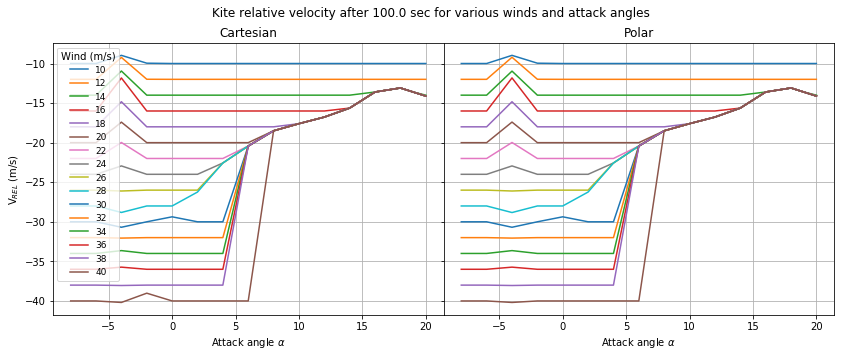

In [22]:
fig, axs = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(14, 5), gridspec_kw={'wspace': 0})

for w in range(wmin, wmax, step): 
    
    fig.suptitle("Kite relative velocity after " + str(time) + " sec for various winds and attack angles")
    
    wdfc = cdata.loc[cdata['Wind_x'] == float(w)]
    axs[0].plot(wdfc['Alpha'], wdfc['Vrelx'], label=str(w))
    plt.grid(b=True)
    
    wdfs = sdata.loc[sdata['Wind_x'] == float(w)]
    axs[1].plot(wdfs['Alpha'], wdfs['Vrelx'], label=str(w))
    axs[0].grid(b=True)
    
    axs[0].legend(title = r'Wind (m/s)', fontsize = legend_fs, loc='upper left', prop={"size":9})
    axs[0].set_ylabel(r'V$_{REL}$ (m/s)')
    
    axs[0].set_title("Cartesian")
    axs[1].set_title("Polar")
    
for ax in axs.flat:
    ax.set(xlabel='Attack angle ' + r'$\alpha$')
    
plt.savefig('Images/vrel_alpha_pi4.png')